## Experiments

### Import libraries and load dataset

In [5]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import os
import math 
from data.load_data import load_monk, load_MLCup
from src.model import MLP
from src.Optimizers import HBG, CG
from src.GridSearch import GridSearch
from src.EarlyStopping import EarlyStopping

In [6]:
path = os.getcwd()
file_train = '/data/ML-CUP22-TR.csv'
file_test = '/data/ML-CUP22-TS.csv'

labels_train = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','y1','y2']
labels_test = ['x1','x2','x3','x4','x5','x6','x7','x8','x9']

X_train, y_train = load_MLCup(path + file_train, labels_train)
X_test = load_MLCup(path + file_test, labels_test)

### Experiment 1. Convex optimization. (Linear NN).

#### Grid Search
Nel CG, sceglie sempre m2 minore possibile (ma vuol dire anche che va più lento... che vogliamo fare?) \
forse il modo di fare la grid search è mettere le max epochs come stopping condition così in qualche modo consideriamo anche la velocità

In [26]:
params_grid = {
    'alpha' : [0.0005, 0.001, 0.005, 0.01],
    'beta' : [0.7, 0.8, 0.9],
    'stopping_value' : [1e-4],
    'alpha_l2' : [0.001]
}

model = MLP([20], 9, 2, task = "regression", activation_function = 'id')
optimizer = HBG(loss = 'MSE', regularization_function = 'l2', stopping_criterion = 'obj_tol', early_stopping=EarlyStopping(mode='obj_tol'))

grid = GridSearch(optimizer, model, objective = 'training_objective')

grid.fit(X_train, y_train, params_grid, parallel = True)

Grid search of 12 combinations.


100%|██████████| 12/12 [00:00<00:00, 9701.55it/s]




Parameters of best model, evaluated on training_objective: {'alpha': 0.01, 'beta': 0.8, 'stopping_value': 0.0001, 'alpha_l2': 0.001} 
Best training_objective: 3.0194698413725622


In [30]:
params_grid = {
    'm2' : [0.2, 0.3, 0.4],
    'm1' : [0.1],
    'stopping_value' : [1e-4],
    'beta_type' : ['FR'],
    'alpha_l2' : [0.001]
}

model = MLP([20], 9, 2, task = "regression", activation_function = 'id')
optimizer = CG(loss = 'MSE', regularization_function = 'l2', stopping_criterion = 'obj_tol', early_stopping=EarlyStopping(mode='obj_tol'))

grid = GridSearch(optimizer, model, objective = 'training_objective')

grid.fit(X_train, y_train, params_grid, parallel = True)
grid.results

Grid search of 3 combinations.


100%|██████████| 3/3 [00:00<00:00, 3455.89it/s]




Parameters of best model, evaluated on training_objective: {'m2': 0.2, 'm1': 0.1, 'stopping_value': 0.0001, 'beta_type': 'FR', 'alpha_l2': 0.001} 
Best training_objective: 3.0204002594068124


[(3.0204002594068124,
  {'m2': 0.2,
   'm1': 0.1,
   'stopping_value': 0.0001,
   'beta_type': 'FR',
   'alpha_l2': 0.001},
  [3.0204002594068124]),
 (3.020591344491218,
  {'m2': 0.3,
   'm1': 0.1,
   'stopping_value': 0.0001,
   'beta_type': 'FR',
   'alpha_l2': 0.001},
  [3.020591344491218]),
 (3.0238889214013436,
  {'m2': 0.4,
   'm1': 0.1,
   'stopping_value': 0.0001,
   'beta_type': 'FR',
   'alpha_l2': 0.001},
  [3.0238889214013436])]

In [31]:
params_grid = {
    'm2' : [0.1, 0.2, 0.3, 0.4],
    'm1' : [0.05],
    'stopping_value' : [1e-4],
    'beta_type' : ['HS+'],
    'alpha_l2' : [0.001]
}

model = MLP([20], 9, 2, task = "regression", activation_function = 'id')
optimizer = CG(loss = 'MSE', regularization_function = 'l2', stopping_criterion = 'obj_tol', early_stopping=EarlyStopping(mode='obj_tol'))

grid = GridSearch(optimizer, model, objective = 'training_objective')

grid.fit(X_train, y_train, params_grid, parallel = True)
grid.results

Grid search of 4 combinations.


100%|██████████| 4/4 [00:00<00:00, 4639.72it/s]




Parameters of best model, evaluated on training_objective: {'m2': 0.1, 'm1': 0.05, 'stopping_value': 0.0001, 'beta_type': 'HS+', 'alpha_l2': 0.001} 
Best training_objective: 3.019217026702769


[(3.019217026702769,
  {'m2': 0.1,
   'm1': 0.05,
   'stopping_value': 0.0001,
   'beta_type': 'HS+',
   'alpha_l2': 0.001},
  [3.019217026702769]),
 (3.019715570367304,
  {'m2': 0.2,
   'm1': 0.05,
   'stopping_value': 0.0001,
   'beta_type': 'HS+',
   'alpha_l2': 0.001},
  [3.019715570367304]),
 (3.0220807501190334,
  {'m2': 0.3,
   'm1': 0.05,
   'stopping_value': 0.0001,
   'beta_type': 'HS+',
   'alpha_l2': 0.001},
  [3.0220807501190334]),
 (3.028330990903443,
  {'m2': 0.4,
   'm1': 0.05,
   'stopping_value': 0.0001,
   'beta_type': 'HS+',
   'alpha_l2': 0.001},
  [3.028330990903443])]

In [32]:
params_grid = {
    'm2' : [0.1, 0.2, 0.3, 0.4],
    'm1' : [0.05],
    'stopping_value' : [1e-4],
    'beta_type' : ['PR+'],
    'alpha_l2' : [0.001]
}

model = MLP([20], 9, 2, task = "regression", activation_function = 'id')
optimizer = CG(loss = 'MSE', regularization_function = 'l2', stopping_criterion = 'obj_tol', early_stopping=EarlyStopping(mode='obj_tol'))

grid = GridSearch(optimizer, model, objective = 'training_objective')

grid.fit(X_train, y_train, params_grid, parallel = True)
grid.results

Grid search of 4 combinations.


100%|██████████| 4/4 [00:00<00:00, 6408.41it/s]




Parameters of best model, evaluated on training_objective: {'m2': 0.1, 'm1': 0.05, 'stopping_value': 0.0001, 'beta_type': 'PR+', 'alpha_l2': 0.001} 
Best training_objective: 3.0171278820154255


[(3.0171278820154255,
  {'m2': 0.1,
   'm1': 0.05,
   'stopping_value': 0.0001,
   'beta_type': 'PR+',
   'alpha_l2': 0.001},
  [3.0171278820154255]),
 (3.0207970660148047,
  {'m2': 0.2,
   'm1': 0.05,
   'stopping_value': 0.0001,
   'beta_type': 'PR+',
   'alpha_l2': 0.001},
  [3.0207970660148047]),
 (3.022388246654098,
  {'m2': 0.3,
   'm1': 0.05,
   'stopping_value': 0.0001,
   'beta_type': 'PR+',
   'alpha_l2': 0.001},
  [3.022388246654098]),
 (3.0255918915790696,
  {'m2': 0.4,
   'm1': 0.05,
   'stopping_value': 0.0001,
   'beta_type': 'PR+',
   'alpha_l2': 0.001},
  [3.0255918915790696])]

#### Experiments

HBG:
Epoch 0 - Objective function: 447.5360616642547 - Gradient norm: 28.955194278722754
Epoch 1 - Objective function: 443.35515383923536 - Gradient norm: 28.803272936346968
Epoch 2 - Objective function: 435.9061575757305 - Gradient norm: 28.54076383514267
Epoch 3 - Objective function: 425.9636235162515 - Gradient norm: 28.205344922416348
Epoch 4 - Objective function: 414.16630023348245 - Gradient norm: 27.829409054147384
Epoch 5 - Objective function: 401.02704612222146 - Gradient norm: 27.445740105606696
Epoch 6 - Objective function: 386.94378795759104 - Gradient norm: 27.098992803529068
Epoch 7 - Objective function: 372.2049008854041 - Gradient norm: 26.861549631882347
Epoch 8 - Objective function: 356.98299190675976 - Gradient norm: 26.854017838903793
Epoch 9 - Objective function: 341.3106745217589 - Gradient norm: 27.2699910782655
Epoch 10 - Objective function: 325.02953709566253 - Gradient norm: 28.39651664036869
Epoch 11 - Objective function: 307.7004039204313 - Gradient norm: 30

Text(0, 0.5, 'grad norm')

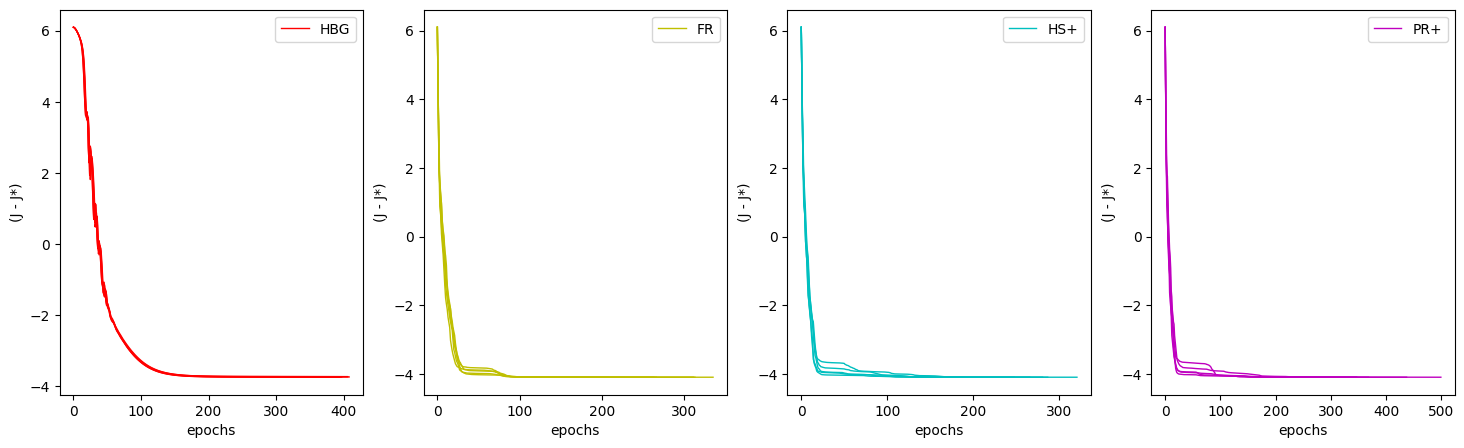

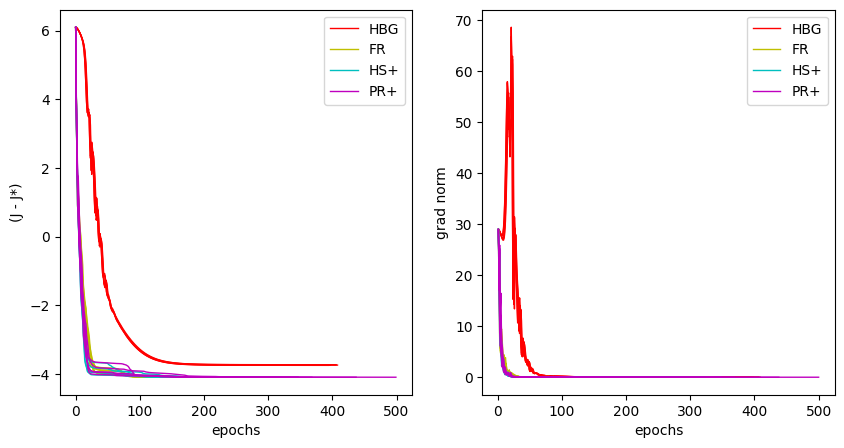

In [15]:
mlp_linear = MLP([20], 9, 2, task = "regression", activation_function = 'id')

J_star = 3

fig, ax = plt.subplots(1,4, figsize = (18,5))
fig2, ax2 = plt.subplots(1,2, figsize = (10,5))
linewidth = 1

optimizer = HBG(loss = 'MSE', regularization_function = 'l2', stopping_criterion = 'grad_norm', early_stopping = EarlyStopping(mode = 'grad_norm'))

feval = []
epochs = []
elapsed_time = []
J_min = []

print('HBG:')

for i in range(5):

    mlp_linear.initialize(random_seed=i)
    optimizer.initialize(mlp_linear, alpha = 0.005, beta = 0.8, stopping_value = 5e-3, alpha_l2 = 0.001, verbose = True)

    tic = time.time()

    optimizer.fit_model(X_train, y_train)
    
    toc = time.time()
    elapsed_time.append(toc-tic)

    curve = [math.log(J - J_star) for J in optimizer.obj_history]
    line, = ax[0].plot(curve, 'r', linewidth=linewidth)
    line2, = ax2[0].plot(curve, 'r', linewidth=linewidth)
    line3, = ax2[1].plot(optimizer.grad_norm_history, 'r', linewidth=linewidth)
        

    if i == 0:
        line.set_label('HBG')
        line2.set_label('HBG')
        line3.set_label('HBG')
    
    J_min.append(np.min(optimizer.obj_history))
    feval.append(optimizer.n_forward_backward)
    epochs.append(len(optimizer.obj_history))

print(f"J_min: {J_min}")
print(f"mean: {np.mean(J_min)}; std: {np.std(J_min)}")
print(f"mean number of epochs for convergence: {np.mean(epochs)}")
print(f"mean number of function evaluations for convergence: {np.mean(feval)}")
print(f"mean elapsed time for convergence: {np.mean(elapsed_time)}")

optimizer = CG(loss = 'MSE', regularization_function = 'l2', stopping_criterion = 'grad_norm', early_stopping = EarlyStopping(mode = 'grad_norm'))
beta_color = {'FR' : 'y', 'HS+' : 'c', 'PR+' : 'm'}

for b, beta in enumerate(['FR', 'HS+', 'PR+']):
    feval = []
    epochs = []
    elapsed_time = []
    J_min = []
    
    print('\n')
    print(f'CG ({beta}):')
    for i in range(5):

        mlp_linear.initialize(random_seed=i)
        optimizer.initialize(mlp_linear, stopping_value = 5e-3, batch_size = -1, alpha_l1 = 0, alpha_l2 = 0.001, verbose = True,
                   beta_type = beta, m1 = 0.1, m2 = 0.3, MaxFeval = 100, tau = 0.8, delta = 0, eps = 0, sfgrd = 0.2)
        
        tic = time.time()

        optimizer.fit_model(X_train, y_train)

        toc = time.time()
        elapsed_time.append(toc-tic)

        curve = [math.log(J - J_star)  for J in optimizer.obj_history]
        line, = ax[b+1].plot(curve, beta_color[beta], linewidth=linewidth)
        line2, = ax2[0].plot(curve, beta_color[beta], linewidth=linewidth)
        line3, = ax2[1].plot(optimizer.grad_norm_history, beta_color[beta], linewidth=linewidth)
        
        if i == 0:
            line.set_label(beta)
            line2.set_label(beta)
            line3.set_label(beta)
    
        J_min.append(np.min(optimizer.obj_history))
        feval.append(optimizer.n_forward_backward)
        epochs.append(len(optimizer.obj_history))

    print(f"J_min: {J_min}")
    print(f"mean: {np.mean(J_min)}; std: {np.std(J_min)}")
    print(f"mean number of epochs for convergence: {np.mean(epochs)}")
    print(f"mean number of function evaluations for convergence: {np.mean(feval)}")
    print(f"mean elapsed time for convergence: {np.mean(elapsed_time)}")

for j in range(4):
    ax[j].legend()
    ax[j].set_xlabel("epochs")
    ax[j].set_ylabel("(J - J*)")
    
ax2[0].legend()
ax2[0].set_xlabel("epochs")
ax2[0].set_ylabel("(J - J*)")
ax2[1].legend()
ax2[1].set_xlabel("epochs")
ax2[1].set_ylabel("grad norm")

### Experiment 2. Non-convex optimization. (Non linear NN). 

Anche qui ci sarebbero prima le grid search da fare

#### Shallow NN [9, 20]

##### Grid Search

In [42]:
params_grid = {
    'alpha' : [0.001, 0.005, 0.01],
    'beta' : [0.7, 0.8, 0.9],
    'stopping_value' : [1e-4],
    'alpha_l2' : [0.001]
}

model = MLP([40,20], 9, 2, task = "regression", activation_function = 'sigm')
optimizer = HBG(loss = 'MSE', regularization_function = 'l2', stopping_criterion = 'obj_tol', early_stopping=EarlyStopping(mode='obj_tol'))

grid = GridSearch(optimizer, model, objective = 'training_objective')

grid.fit(X_train, y_train, params_grid, parallel = True)

Grid search of 9 combinations.


100%|██████████| 9/9 [00:00<00:00, 64.07it/s]




Parameters of best model, evaluated on training_objective: {'alpha': 0.01, 'beta': 0.9, 'stopping_value': 0.0001, 'alpha_l2': 0.001} 
Best training_objective: 1.9834329060311187


In [43]:
params_grid = {
    'm2' : [0.2],
    'm1' : [0.1],
    'stopping_value' : [1e-4],
    'beta_type' : ['FR'],
    'alpha_l2' : [0.001]
}

model = MLP([40, 20], 9, 2, task = "regression", activation_function = 'sigm')
optimizer = CG(loss = 'MSE', regularization_function = 'l2', stopping_criterion = 'obj_tol', early_stopping=EarlyStopping(mode='obj_tol'))

grid = GridSearch(optimizer, model, objective = 'training_objective')

grid.fit(X_train, y_train, params_grid, parallel = True)
grid.results

Grid search of 1 combinations.


100%|██████████| 1/1 [00:00<00:00, 735.97it/s]




Parameters of best model, evaluated on training_objective: {'m2': 0.2, 'm1': 0.1, 'stopping_value': 0.0001, 'beta_type': 'FR', 'alpha_l2': 0.001} 
Best training_objective: 1.7548073382125697


[(1.7548073382125697,
  {'m2': 0.2,
   'm1': 0.1,
   'stopping_value': 0.0001,
   'beta_type': 'FR',
   'alpha_l2': 0.001},
  [1.7548073382125697])]

In [36]:
params_grid = {
    'm2' : [0.2, 0.3, 0.4],
    'm1' : [0.1],
    'stopping_value' : [1e-4],
    'beta_type' : ['HS+'],
    'alpha_l2' : [0.001]
}

model = MLP([20], 9, 2, task = "regression", activation_function = 'sigm')
optimizer = CG(loss = 'MSE', regularization_function = 'l2', stopping_criterion = 'obj_tol', early_stopping=EarlyStopping(mode='obj_tol'))

grid = GridSearch(optimizer, model, objective = 'training_objective')

grid.fit(X_train, y_train, params_grid, parallel = True)
grid.results

Grid search of 3 combinations.


100%|██████████| 3/3 [00:00<00:00, 3488.47it/s]




Parameters of best model, evaluated on training_objective: {'m2': 0.3, 'm1': 0.1, 'stopping_value': 0.0001, 'beta_type': 'HS+', 'alpha_l2': 0.001} 
Best training_objective: 1.7174304706377628


[(1.7174304706377628,
  {'m2': 0.3,
   'm1': 0.1,
   'stopping_value': 0.0001,
   'beta_type': 'HS+',
   'alpha_l2': 0.001},
  [1.7174304706377628]),
 (1.7232152801929823,
  {'m2': 0.4,
   'm1': 0.1,
   'stopping_value': 0.0001,
   'beta_type': 'HS+',
   'alpha_l2': 0.001},
  [1.7232152801929823]),
 (1.7340317009081097,
  {'m2': 0.2,
   'm1': 0.1,
   'stopping_value': 0.0001,
   'beta_type': 'HS+',
   'alpha_l2': 0.001},
  [1.7340317009081097])]

In [38]:
params_grid = {
    'm2' : [0.2, 0.3, 0.4],
    'm1' : [0.1],
    'stopping_value' : [1e-4],
    'beta_type' : ['PR+'],
    'alpha_l2' : [0.001]
}

model = MLP([20], 9, 2, task = "regression", activation_function = 'sigm')
optimizer = CG(loss = 'MSE', regularization_function = 'l2', stopping_criterion = 'obj_tol', early_stopping=EarlyStopping(mode='obj_tol'))

grid = GridSearch(optimizer, model, objective = 'training_objective')

grid.fit(X_train, y_train, params_grid, parallel = True)
grid.results

Grid search of 3 combinations.


100%|██████████| 3/3 [00:00<00:00, 4510.00it/s]




Parameters of best model, evaluated on training_objective: {'m2': 0.3, 'm1': 0.1, 'stopping_value': 0.0001, 'beta_type': 'PR+', 'alpha_l2': 0.001} 
Best training_objective: 1.7198768192991802


[(1.7198768192991802,
  {'m2': 0.3,
   'm1': 0.1,
   'stopping_value': 0.0001,
   'beta_type': 'PR+',
   'alpha_l2': 0.001},
  [1.7198768192991802]),
 (1.722882818399361,
  {'m2': 0.4,
   'm1': 0.1,
   'stopping_value': 0.0001,
   'beta_type': 'PR+',
   'alpha_l2': 0.001},
  [1.722882818399361]),
 (1.7364728347776175,
  {'m2': 0.2,
   'm1': 0.1,
   'stopping_value': 0.0001,
   'beta_type': 'PR+',
   'alpha_l2': 0.001},
  [1.7364728347776175])]

##### Experiments

HBG:
J_min: [1.9216917451749576, 1.9525025675635144, 1.9217773944046468, 1.9166427689954422, 1.9124172666970427]
mean: 1.9250063485671205; std: 0.014183717744735772
mean number of epochs for convergence: 1500.4
mean number of function evaluations for convergence: 1500.4
mean elapsed time for convergence: 6.317409992218018


CG (FR):
J_min: [1.7897228153065183, 1.7826960877790274, 1.7948182510858546, 1.785649335871788, 1.7551251181629828]
mean: 1.7816023216412344; std: 0.013850777314131656
mean number of epochs for convergence: 501.2
mean number of function evaluations for convergence: 2345.8
mean elapsed time for convergence: 8.796113014221191


CG (HS+):
J_min: [1.7260811448731161, 1.7147273484241272, 1.7261204258045235, 1.7514411583379639, 1.7204043631310064]
mean: 1.7277548881141478; std: 0.012571867709270287
mean number of epochs for convergence: 423.0
mean number of function evaluations for convergence: 4228.6
mean elapsed time for convergence: 13.473115539550781


CG (PR+):
J_min

(0.0, 15.0)

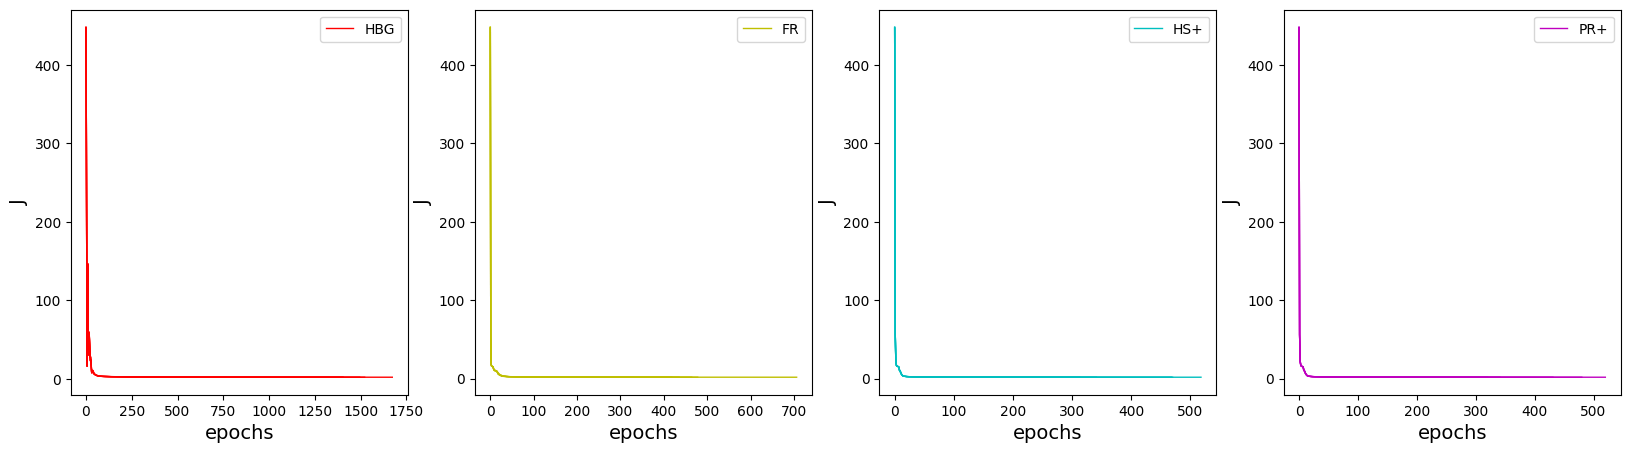

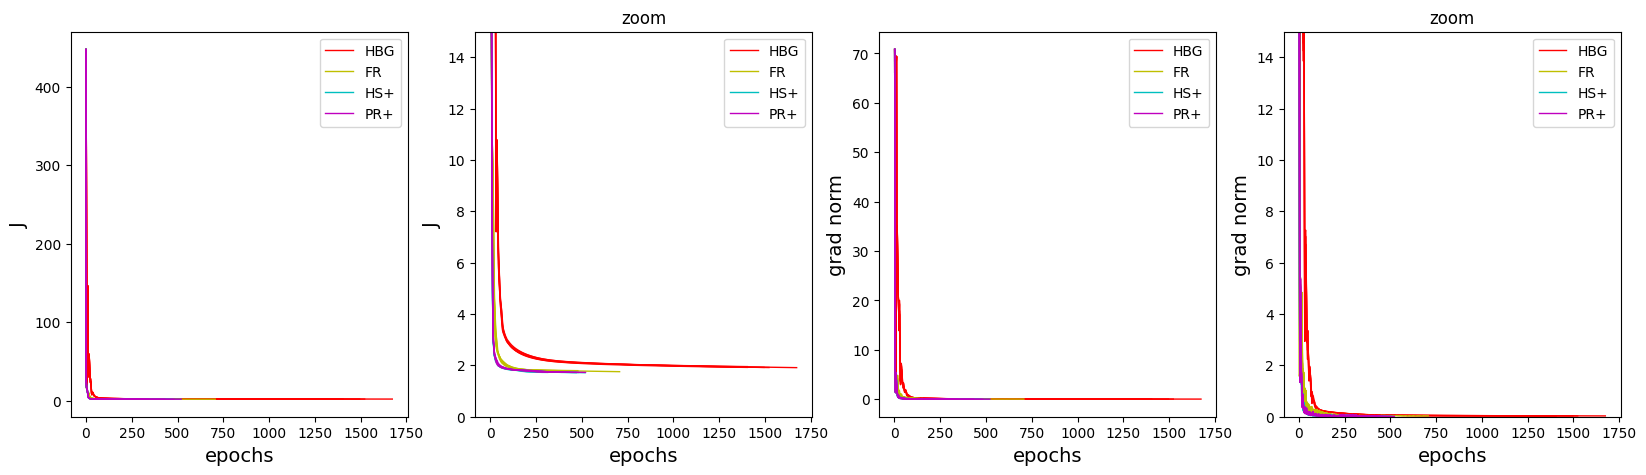

In [55]:
mlp= MLP([20], 9, 2, task = "regression", activation_function = 'sigm')

J_star = 0 #fill with grid search results

fig, ax = plt.subplots(1,4, figsize = (20,5))
fig2, ax2 = plt.subplots(1,4, figsize = (20,5))
linewidth = 1
fontsize = 14

optimizer = HBG(loss = 'MSE', regularization_function = 'l2', stopping_criterion = 'obj_tol', early_stopping=EarlyStopping(mode = 'obj_tol'))

feval = []
epochs = []
elapsed_time = []
J_min = []

print('HBG:')

for i in range(5):

    mlp.initialize(random_seed=i)
    optimizer.initialize(mlp, alpha = 0.01, beta = 0.9, stopping_value = 1e-4, alpha_l2 = 0.001, verbose = False)

    tic = time.time()

    optimizer.fit_model(X_train, y_train)
    
    toc = time.time()
    elapsed_time.append(toc-tic)

    curve = [J - J_star for J in optimizer.obj_history]
    line, = ax[0].plot(curve, 'r', linewidth=linewidth)
    line2, = ax2[0].plot(curve, 'r', linewidth=linewidth)
    line3, = ax2[2].plot(optimizer.grad_norm_history, 'r', linewidth=linewidth)
    line2z, = ax2[1].plot(curve, 'r', linewidth=linewidth)
    line3z, = ax2[3].plot(optimizer.grad_norm_history, 'r', linewidth=linewidth)
         

    if i == 0:
        line.set_label('HBG')
        line2.set_label('HBG')
        line3.set_label('HBG')
        line2z.set_label('HBG')
        line3z.set_label('HBG')
    
    J_min.append(np.min(optimizer.obj_history))
    feval.append(optimizer.n_forward_backward)
    epochs.append(len(optimizer.obj_history))

print(f"J_min: {J_min}")
print(f"mean: {np.mean(J_min)}; std: {np.std(J_min)}")
print(f"mean number of epochs for convergence: {np.mean(epochs)}")
print(f"mean number of function evaluations for convergence: {np.mean(feval)}")
print(f"mean elapsed time for convergence: {np.mean(elapsed_time)}")


optimizer = CG(loss = 'MSE', regularization_function = 'l2', stopping_criterion = 'obj_tol', early_stopping=EarlyStopping(mode='obj_tol'))
beta_color = {'FR' : 'y', 'HS+' : 'c', 'PR+' : 'm'}

for b, beta in enumerate(['FR', 'HS+', 'PR+']):
    feval = []
    epochs = []
    elapsed_time = []
    J_min = []
    
    print('\n')
    print(f'CG ({beta}):')
    for i in range(5):

        mlp.initialize(random_seed=i)
        optimizer.initialize(mlp, stopping_value = 1e-4, batch_size = -1, alpha_l1 = 0, alpha_l2 = 0.001, verbose = False,
                   beta_type = beta, m1 = 0.1, m2 = 0.3, MaxFeval = 100, tau = 0.8, delta = 0, eps = 0, sfgrd = 0.2)
        
        tic = time.time()

        optimizer.fit_model(X_train, y_train)

        toc = time.time()
        elapsed_time.append(toc-tic)

        curve = [J - J_star for J in optimizer.obj_history]
        line, = ax[b+1].plot(curve, beta_color[beta], linewidth=linewidth)
        line2, = ax2[0].plot(curve, beta_color[beta], linewidth=linewidth)
        line3, = ax2[2].plot(optimizer.grad_norm_history, beta_color[beta], linewidth=linewidth)
        line2z, = ax2[1].plot(curve, beta_color[beta], linewidth=linewidth)
        line3z, = ax2[3].plot(optimizer.grad_norm_history, beta_color[beta], linewidth=linewidth)
        
        
        if i == 0:
            line.set_label(beta)
            line2.set_label(beta)
            line3.set_label(beta)
            line2z.set_label(beta)
            line3z.set_label(beta)
    
        J_min.append(np.min(optimizer.obj_history))
        feval.append(optimizer.n_forward_backward)
        epochs.append(len(optimizer.obj_history))

    print(f"J_min: {J_min}")
    print(f"mean: {np.mean(J_min)}; std: {np.std(J_min)}")
    print(f"mean number of epochs for convergence: {np.mean(epochs)}")
    print(f"mean number of function evaluations for convergence: {np.mean(feval)}")
    print(f"mean elapsed time for convergence: {np.mean(elapsed_time)}")

for j in range(4):
    ax[j].legend()
    ax[j].set_xlabel("epochs", fontsize=fontsize)
    ax[j].set_ylabel("J", fontsize=fontsize)
    
ax2[0].legend()
ax2[0].set_xlabel("epochs", fontsize=fontsize)
ax2[0].set_ylabel("J", fontsize=fontsize)
ax2[2].legend()
ax2[2].set_xlabel("epochs", fontsize=fontsize)
ax2[2].set_ylabel("grad norm", fontsize=fontsize)

ax2[1].set_title("zoom")
ax2[1].legend()
ax2[1].set_xlabel("epochs", fontsize=fontsize)
ax2[1].set_ylabel("J", fontsize=fontsize)
ax2[1].set_ylim(0,15)

ax2[3].set_title("zoom")
ax2[3].legend()
ax2[3].set_xlabel("epochs", fontsize=fontsize)
ax2[3].set_ylabel("grad norm", fontsize=fontsize)
ax2[3].set_ylim(0,15)

#### Deep NN [9, 40, 20]

HBG:
J_min: [1.9834329060311187, 1.9976808492308082, 1.9721022233502834, 2.007065678583324, 1.997390788333286]
mean: 1.991534489105764; std: 0.012300735187165726
mean number of epochs for convergence: 1198.6
mean number of function evaluations for convergence: 1198.6
mean elapsed time for convergence: 9.55808162689209


CG (FR):
J_min: [1.7665737773446042, 1.7395396359428676, 1.7934030435189081, 1.736017614195341, 1.7432828499375048]
mean: 1.7557633841878453; std: 0.021644757931884504
mean number of epochs for convergence: 1162.4
mean number of function evaluations for convergence: 5254.2
mean elapsed time for convergence: 39.644507789611815


CG (HS+):
J_min: [1.7262615149603573, 1.7001041979383205, 1.7161960191707126, 1.7033633442960006, 1.7270447999185252]
mean: 1.7145939752567834; std: 0.011223206143611603
mean number of epochs for convergence: 717.8
mean number of function evaluations for convergence: 3787.2
mean elapsed time for convergence: 24.39667077064514


CG (PR+):
J_min: [

(0.0, 15.0)

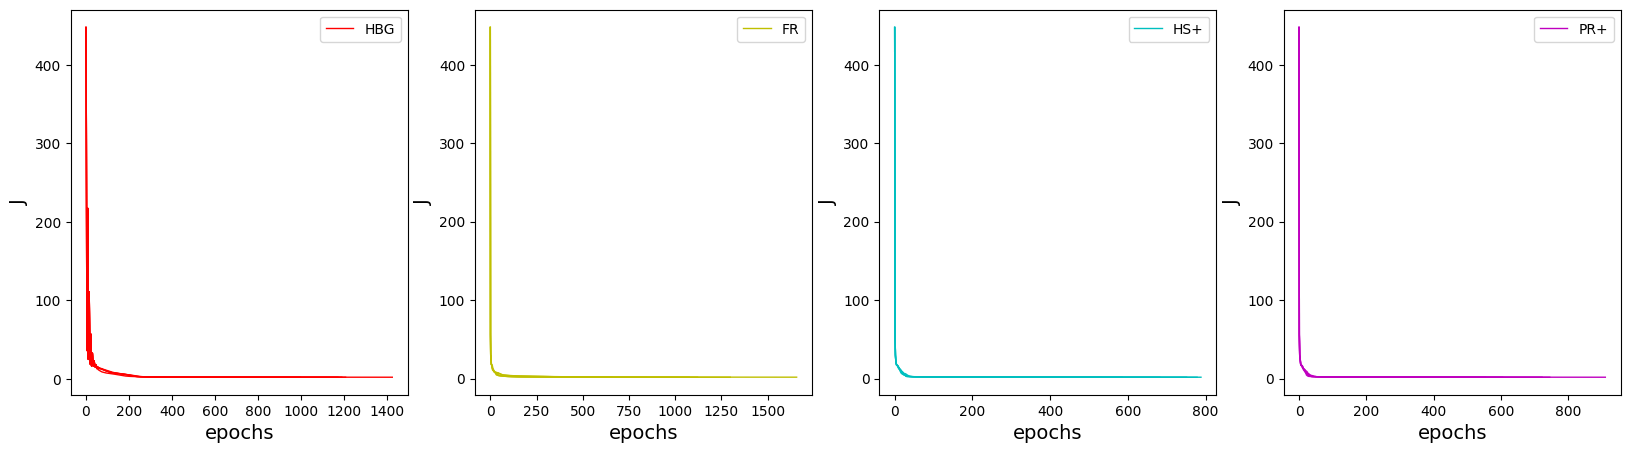

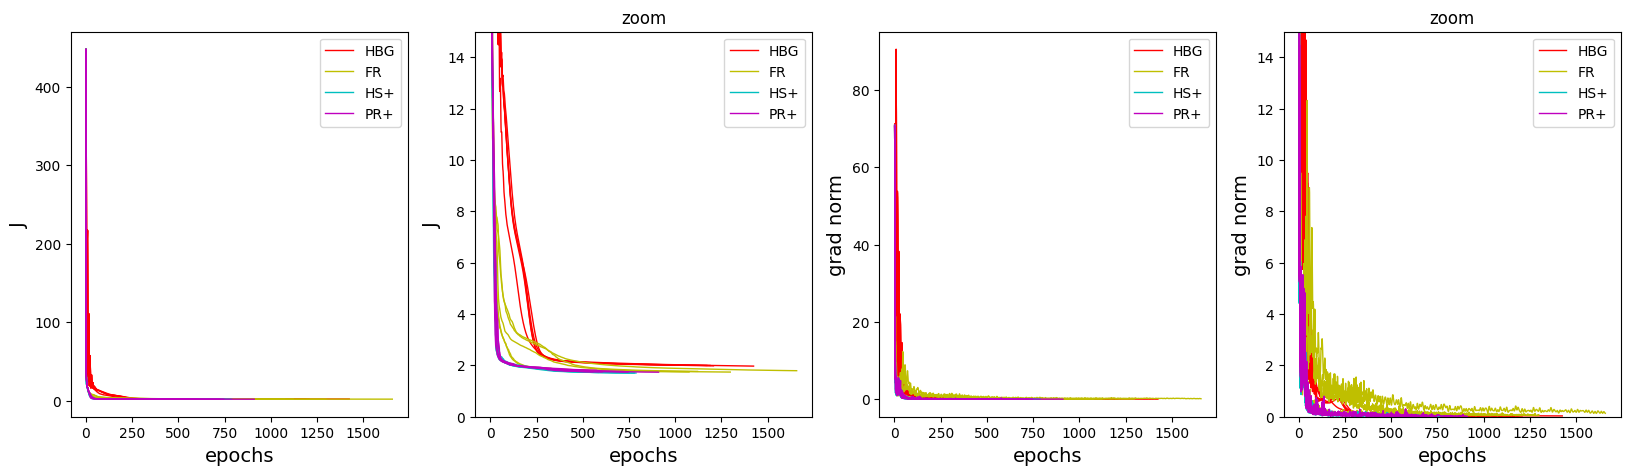

In [57]:
mlp= MLP([40, 20], 9, 2, task = "regression", activation_function = 'sigm')

J_star = 0 #fill with grid search results

fig, ax = plt.subplots(1,4, figsize = (20,5))
fig2, ax2 = plt.subplots(1,4, figsize = (20,5))
linewidth = 1
fontsize = 14

optimizer = HBG(loss = 'MSE', regularization_function = 'l2', stopping_criterion = 'obj_tol', early_stopping = EarlyStopping(mode = 'obj_tol'))

feval = []
epochs = []
elapsed_time = []
J_min = []

print('HBG:')

for i in range(5):

    mlp.initialize(random_seed=i)
    optimizer.initialize(mlp, alpha = 0.01, beta = 0.9, stopping_value = 1e-4, alpha_l2 = 0.001, verbose = False)

    tic = time.time()

    optimizer.fit_model(X_train, y_train)
    
    toc = time.time()
    elapsed_time.append(toc-tic)

    curve = [J - J_star for J in optimizer.obj_history]
    line, = ax[0].plot(curve, 'r', linewidth=linewidth)
    line2, = ax2[0].plot(curve, 'r', linewidth=linewidth)
    line3, = ax2[2].plot(optimizer.grad_norm_history, 'r', linewidth=linewidth)
    line2z, = ax2[1].plot(curve, 'r', linewidth=linewidth)
    line3z, = ax2[3].plot(optimizer.grad_norm_history, 'r', linewidth=linewidth)
         

    if i == 0:
        line.set_label('HBG')
        line2.set_label('HBG')
        line3.set_label('HBG')
        line2z.set_label('HBG')
        line3z.set_label('HBG')
    
    J_min.append(np.min(optimizer.obj_history))
    feval.append(optimizer.n_forward_backward)
    epochs.append(len(optimizer.obj_history))

print(f"J_min: {J_min}")
print(f"mean: {np.mean(J_min)}; std: {np.std(J_min)}")
print(f"mean number of epochs for convergence: {np.mean(epochs)}")
print(f"mean number of function evaluations for convergence: {np.mean(feval)}")
print(f"mean elapsed time for convergence: {np.mean(elapsed_time)}")


optimizer = CG(loss = 'MSE', regularization_function = 'l2', stopping_criterion = 'obj_tol', early_stopping = EarlyStopping(mode = 'obj_tol'))
beta_color = {'FR' : 'y', 'HS+' : 'c', 'PR+' : 'm'}

for b, beta in enumerate(['FR', 'HS+', 'PR+']):
    feval = []
    epochs = []
    elapsed_time = []
    J_min = []
    
    print('\n')
    print(f'CG ({beta}):')
    for i in range(5):

        mlp.initialize(random_seed=i)
        optimizer.initialize(mlp, stopping_value = 1e-4, batch_size = -1, alpha_l1 = 0, alpha_l2 = 0.001, verbose = False,
                   beta_type = beta, m1 = 0.1, m2 = 0.3, MaxFeval = 100, tau = 0.8, delta = 0, eps = 0, sfgrd = 0.2)
        
        tic = time.time()

        optimizer.fit_model(X_train, y_train)

        toc = time.time()
        elapsed_time.append(toc-tic)

        curve = [J - J_star for J in optimizer.obj_history]
        line, = ax[b+1].plot(curve, beta_color[beta], linewidth=linewidth)
        line2, = ax2[0].plot(curve, beta_color[beta], linewidth=linewidth)
        line3, = ax2[2].plot(optimizer.grad_norm_history, beta_color[beta], linewidth=linewidth)
        line2z, = ax2[1].plot(curve, beta_color[beta], linewidth=linewidth)
        line3z, = ax2[3].plot(optimizer.grad_norm_history, beta_color[beta], linewidth=linewidth)
        
        
        if i == 0:
            line.set_label(beta)
            line2.set_label(beta)
            line3.set_label(beta)
            line2z.set_label(beta)
            line3z.set_label(beta)
    
        J_min.append(np.min(optimizer.obj_history))
        feval.append(optimizer.n_forward_backward)
        epochs.append(len(optimizer.obj_history))

    print(f"J_min: {J_min}")
    print(f"mean: {np.mean(J_min)}; std: {np.std(J_min)}")
    print(f"mean number of epochs for convergence: {np.mean(epochs)}")
    print(f"mean number of function evaluations for convergence: {np.mean(feval)}")
    print(f"mean elapsed time for convergence: {np.mean(elapsed_time)}")

for j in range(4):
    ax[j].legend()
    ax[j].set_xlabel("epochs", fontsize=fontsize)
    ax[j].set_ylabel("J", fontsize=fontsize)
    
ax2[0].legend()
ax2[0].set_xlabel("epochs", fontsize=fontsize)
ax2[0].set_ylabel("J", fontsize=fontsize)
ax2[2].legend()
ax2[2].set_xlabel("epochs", fontsize=fontsize)
ax2[2].set_ylabel("grad norm", fontsize=fontsize)

ax2[1].set_title("zoom")
ax2[1].legend()
ax2[1].set_xlabel("epochs", fontsize=fontsize)
ax2[1].set_ylabel("J", fontsize=fontsize)
ax2[1].set_ylim(0,15)

ax2[3].set_title("zoom")
ax2[3].legend()
ax2[3].set_xlabel("epochs", fontsize=fontsize)
ax2[3].set_ylabel("grad norm", fontsize=fontsize)
ax2[3].set_ylim(0,15)

#### m2



CG (FR):
m2 = 0.2:
J_min: [1.748719445985553, 1.7653816508965372, 1.7200855321523336, 1.7671622710647248, 1.7444753324044382]
mean: 1.7491648465007175; std: 0.017056895865307065
mean number of epochs for convergence: 1331.8
mean number of function evaluations for convergence: 6161.2
mean elapsed time for convergence: 54.42876844406128
m2 = 0.3:
J_min: [1.7665737773446042, 1.7395396359428676, 1.7934030435189081, 1.736017614195341, 1.7432828499375048]
mean: 1.7557633841878453; std: 0.021644757931884504
mean number of epochs for convergence: 1162.4
mean number of function evaluations for convergence: 5254.2
mean elapsed time for convergence: 33.43791904449463
m2 = 0.4:


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


J_min: [1.747465261931258, 1.7440621515147479, 1.762075779144297, 1.7383395627757963, 1.7286210000130637]
mean: 1.7441127510758327; std: 0.011020311437325545
mean number of epochs for convergence: 1305.8
mean number of function evaluations for convergence: 5481.8
mean elapsed time for convergence: 34.88589959144592


CG (HS+):
m2 = 0.2:
J_min: [1.7191485566377946, 1.7098217492248575, 1.7187816841382437, 1.7023372887222443, 1.7162975510636391]
mean: 1.713277365957356; std: 0.006411185438448452
mean number of epochs for convergence: 808.8
mean number of function evaluations for convergence: 4498.6
mean elapsed time for convergence: 29.240278959274292
m2 = 0.3:
J_min: [1.7262615149603573, 1.7001041979383205, 1.7161960191707126, 1.7033633442960006, 1.7270447999185252]
mean: 1.7145939752567834; std: 0.011223206143611603
mean number of epochs for convergence: 717.8
mean number of function evaluations for convergence: 3787.2
mean elapsed time for convergence: 24.771135807037354
m2 = 0.4:


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


J_min: [1.71821727084659, 1.7277284134810218, 1.7228757550481035, 1.724512020653393, 1.7482625933050933]
mean: 1.7283192106668401; std: 0.010433241542053459
mean number of epochs for convergence: 708.6
mean number of function evaluations for convergence: 3603.8
mean elapsed time for convergence: 23.718317365646364


CG (PR+):
m2 = 0.2:
J_min: [1.7460653413599747, 1.7406021789367174, 1.7280269296582647, 1.7281258977684577, 1.7226009710515189]
mean: 1.7330842637549864; std: 0.008775977117053522
mean number of epochs for convergence: 878.8
mean number of function evaluations for convergence: 4345.4
mean elapsed time for convergence: 29.016481781005858
m2 = 0.3:
J_min: [1.7389796255835357, 1.7354982572259523, 1.746477981999436, 1.752368135409652, 1.7596153204421585]
mean: 1.746587864132147; std: 0.008763594047882347
mean number of epochs for convergence: 708.2
mean number of function evaluations for convergence: 3402.6
mean elapsed time for convergence: 25.079325246810914
m2 = 0.4:
J_min: 

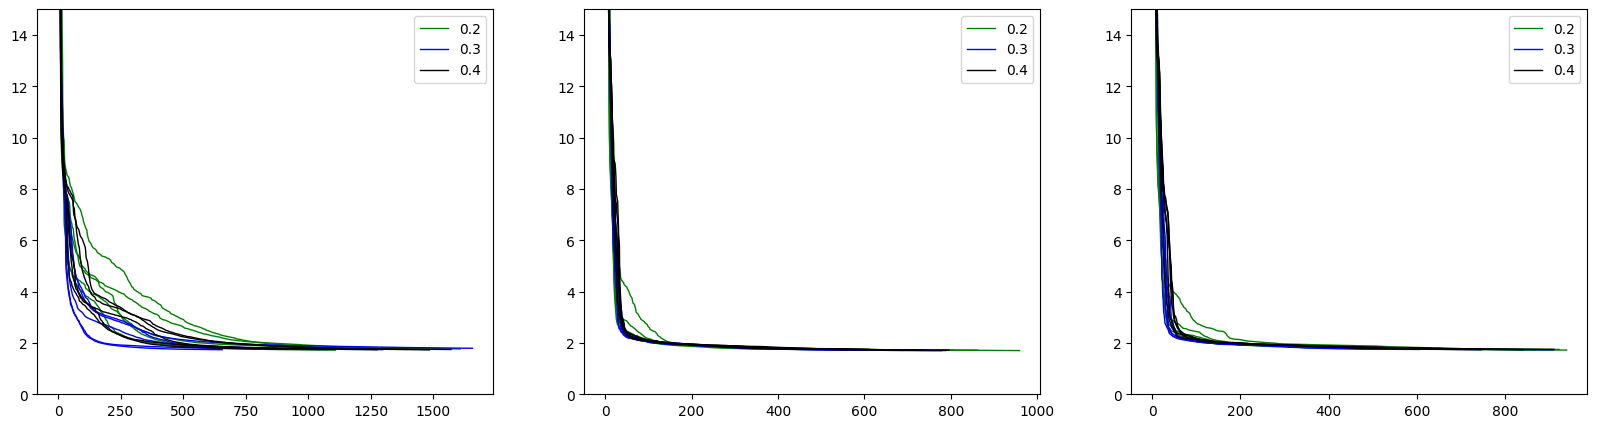

In [63]:
mlp= MLP([40, 20], 9, 2, task = "regression", activation_function = 'sigm')

J_star = 0 #fill with grid search results

fig, ax = plt.subplots(1,3, figsize = (20,5))
linewidth = 1
fontsize = 14

optimizer = CG(loss = 'MSE', regularization_function = 'l2', stopping_criterion = 'obj_tol', early_stopping=EarlyStopping(mode='obj_tol'))
beta_color = {0.2 : 'g', 0.3 : 'b', 0.4 : 'k'}

for b, beta in enumerate(['FR', 'HS+', 'PR+']):
    print('\n')
    print(f'CG ({beta}):')

    for m2 in [0.2, 0.3, 0.4]:
        feval = []
        epochs = []
        elapsed_time = []
        J_min = []

        print(f'm2 = {m2}:')

        for i in range(5):

            mlp.initialize(random_seed=i)
            optimizer.initialize(mlp, stopping_value = 1e-4, batch_size = -1, alpha_l1 = 0, alpha_l2 = 0.001, verbose = False,
                    beta_type = beta, m1 = 0.1, m2 = m2, MaxFeval = 100, tau = 0.8, delta = 0, eps = 0, sfgrd = 0.2)
        
            tic = time.time()

            optimizer.fit_model(X_train, y_train)

            toc = time.time()
            elapsed_time.append(toc-tic)

            curve = [J - J_star for J in optimizer.obj_history]
            line, = ax[b].plot(curve, beta_color[m2], linewidth=linewidth)
        
            if i == 0:
                line.set_label(m2)
    
            J_min.append(np.min(optimizer.obj_history))
            feval.append(optimizer.n_forward_backward)
            epochs.append(len(optimizer.obj_history))

        print(f"J_min: {J_min}")
        print(f"mean: {np.mean(J_min)}; std: {np.std(J_min)}")
        print(f"mean number of epochs for convergence: {np.mean(epochs)}")
        print(f"mean number of function evaluations for convergence: {np.mean(feval)}")
        print(f"mean elapsed time for convergence: {np.mean(elapsed_time)}")

    ax[0].set_ylim(0,15)
    ax[1].set_ylim(0,15)
    ax[2].set_ylim(0,15)
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
        

#### batch size

HBG:
batch size -1
[399.4599154276084, 313.09723664533135, 190.26286745108476, 63.59278340048844, 35.749795552100686, 115.3674344250416, 202.50303358987586, 217.48636631736068, 154.7693907953279, 69.95290317146103, 25.151256522106618, 37.617954341015626, 78.10351274461742, 108.98374136393154, 110.85676666865307, 85.64947216893074, 49.825625179543124, 23.627134823308307, 18.962823046111573, 32.60537948851427, 50.080058653919984, 57.231867427539385, 49.916861792955615, 34.582544049699344, 21.284649180889982, 16.336208485415558, 19.64617474498472, 26.65953200776764, 32.0781430767389, 32.78922436818455, 28.880720891104453, 22.877108050951144, 17.968342285896725, 16.22166335752458, 17.657646830899157, 20.571469439982753, 22.76714593785837, 22.87562457820942, 20.974102988066814, 18.260788102239065, 16.156379850841187, 15.471597967805604, 16.094709664351427, 17.247207771946854, 18.03590635785006, 17.945920226407793, 17.03660081912787, 15.802169023089977, 14.830413395623067, 14.470205551139218

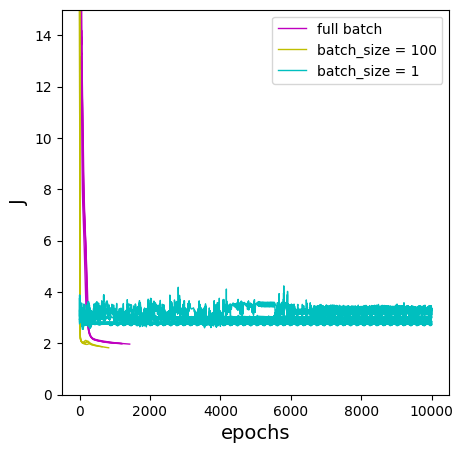

In [5]:
mlp= MLP([40, 20], 9, 2, task = "regression", activation_function = 'sigm')

J_star = 0 #fill with grid search results

fig, ax = plt.subplots(1,1, figsize = (5,5))
linewidth = 1
fontsize = 14

optimizer = HBG(loss = 'MSE', regularization_function = 'l2', stopping_criterion = 'obj_tol', early_stopping = EarlyStopping(mode = 'obj_tol'))

feval = []
epochs = []
elapsed_time = []
J_min = []

batch_color = { -1 : 'm', 100 : 'y', 1 : 'c'}

print('HBG:')

for batch_size in [-1, 100, 1]:
    print(f'batch size {batch_size}')
    for i in range(5):

        mlp.initialize(random_seed=i)
        optimizer.initialize(mlp, alpha = 0.01, beta = 0.9, stopping_value = 1e-4, batch_size = batch_size, alpha_l2 = 0.001, verbose = False)

        tic = time.time()

        optimizer.fit_model(X_train, y_train)
        
        toc = time.time()
        elapsed_time.append(toc-tic)

        curve = [J - J_star for J in optimizer.obj_history_epochs]
        print(curve)
        line, = ax.plot(curve, batch_color[batch_size], linewidth=linewidth)

        if i == 0:
            if batch_size == -1:
                line.set_label('full batch')
            else:
                line.set_label(f'batch_size = {batch_size}')
        
        J_min.append(np.min(optimizer.obj_history_epochs))
        feval.append(optimizer.n_forward_backward)
        epochs.append(len(optimizer.obj_history_epochs))

    print(f"J_min: {J_min}")
    print(f"mean: {np.mean(J_min)}; std: {np.std(J_min)}")
    print(f"mean number of epochs for convergence: {np.mean(epochs)}")
    print(f"mean number of function evaluations for convergence: {np.mean(feval)}")
    print(f"mean elapsed time for convergence: {np.mean(elapsed_time)}")

    ax.legend()
    ax.set_xlabel("epochs", fontsize=fontsize)
    ax.set_ylabel("J", fontsize=fontsize)
    ax.set_ylim(0,15)
    